Class distribution after undersampling:
0.0    3364
1.0    3364
Name: Diabetes_binary, dtype: int64
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 561 (2.19 KB)
Trainable params: 561 (2.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 136ms/step


  0%|          | 0/2019 [00:00<?, ?it/s]

79/79 [==============================] - 0s 2ms/step
[array([[-0.03022518, -0.01257493, -0.14320509, ...,  0.01677522,
         0.02147341, -0.01068455],
       [ 0.        ,  0.        , -0.08158491, ..., -0.0914371 ,
         0.00666485,  0.        ],
       [-0.02961482,  0.00792434,  0.05549363, ...,  0.02221341,
         0.00085508, -0.01496691],
       ...,
       [ 0.0178535 , -0.01155706, -0.04738556, ..., -0.20743349,
         0.03907435,  0.02079133],
       [ 0.02677107,  0.00830674, -0.0657131 , ...,  0.01950338,
         0.02567867, -0.01060915],
       [ 0.01971798,  0.00657137,  0.0233887 , ..., -0.12404723,
        -0.01647502,  0.00377941]])]


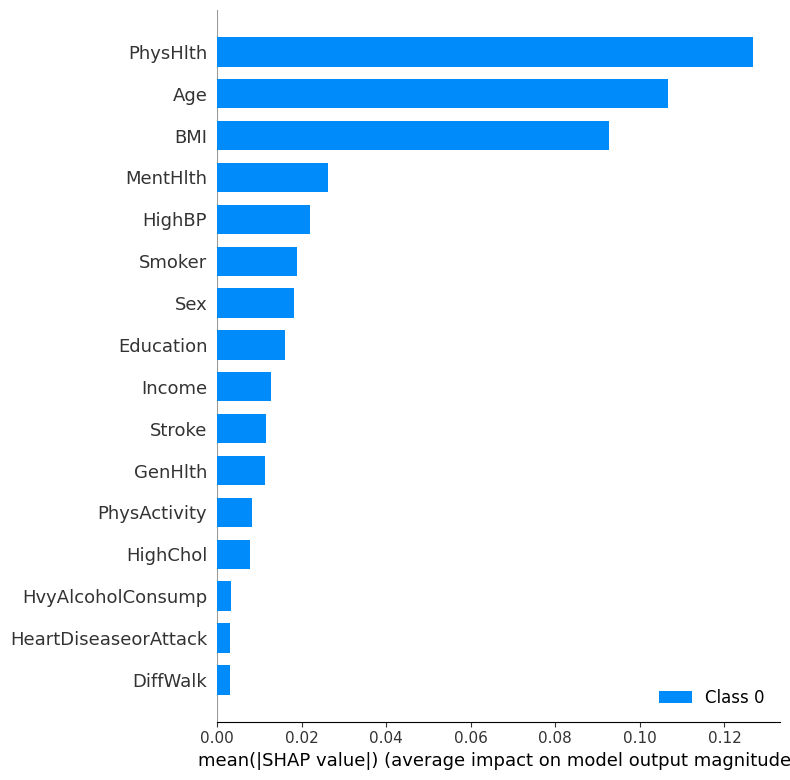

TypeError: ignored

In [13]:


from sklearn.model_selection import train_test_split
import pandas as pd

# fetch dataset
cdc_diabetes_health_indicators = pd.read_csv('diabetesBinary.csv')
y = cdc_diabetes_health_indicators['Diabetes_binary']
cdc_diabetes_health_indicators.drop(columns=cdc_diabetes_health_indicators.columns[0], axis=1, inplace=True)
X = cdc_diabetes_health_indicators.fillna(0)

# data (as pandas dataframes)
# X = cdc_diabetes_health_indicators.data.features
# y = cdc_diabetes_health_indicators.data.targets

# # metadata
# print(cdc_diabetes_health_indicators.metadata)

# # variable information

# metadata
# print(cdc_diabetes_health_indicators.metadata)

# # variable information
# print(cdc_diabetes_health_indicators.variables)

df = pd.concat([X, y], axis=1)

X=df[['HighBP', 'HighChol','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','HvyAlcoholConsump','GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]
y=df['Diabetes_binary']



from imblearn.under_sampling import NearMiss

# Define the NearMiss undersampler
# You can experiment with different versions (1, 2, 3) and n_neighbors values
nm = NearMiss(version=1, n_neighbors=15)

# Fit and transform your data to undersample the majority class
X_resampled, y_resampled = nm.fit_resample(X, y)

# Check the class distribution after undersampling
print("Class distribution after undersampling:")
print(y_resampled.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=100)

from keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy',
                                   mode='max',
                                   patience=10,
                                   restore_best_weights=True)

import shap
# Choose one of the following methods to summarize the background
# Option 1: shap.sample
background_summary = shap.sample(X_train, 25)  # Adjust the number of samples (K)
# Option 2: shap.kmeans
# background_summary = shap.kmeans(X_train, 100)  # Adjust the number of samples (K)

explainer = shap.KernelExplainer(model.predict, background_summary)
shap_values = explainer.shap_values(X_test, nsamples=100)

print(shap_values)

shap.summary_plot(shap_values,X_test)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:]  ,X_test[0,:],feature_names=features)

history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80,
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

In [16]:
import numpy as np
np.mean(shap_values)

0.0019490036412283828

In [17]:
shap_values

[array([[-0.03022518, -0.01257493, -0.14320509, ...,  0.01677522,
          0.02147341, -0.01068455],
        [ 0.        ,  0.        , -0.08158491, ..., -0.0914371 ,
          0.00666485,  0.        ],
        [-0.02961482,  0.00792434,  0.05549363, ...,  0.02221341,
          0.00085508, -0.01496691],
        ...,
        [ 0.0178535 , -0.01155706, -0.04738556, ..., -0.20743349,
          0.03907435,  0.02079133],
        [ 0.02677107,  0.00830674, -0.0657131 , ...,  0.01950338,
          0.02567867, -0.01060915],
        [ 0.01971798,  0.00657137,  0.0233887 , ..., -0.12404723,
         -0.01647502,  0.00377941]])]

In [28]:
shap.plots.waterfall(shap_values[X_test)

TypeError: ignored

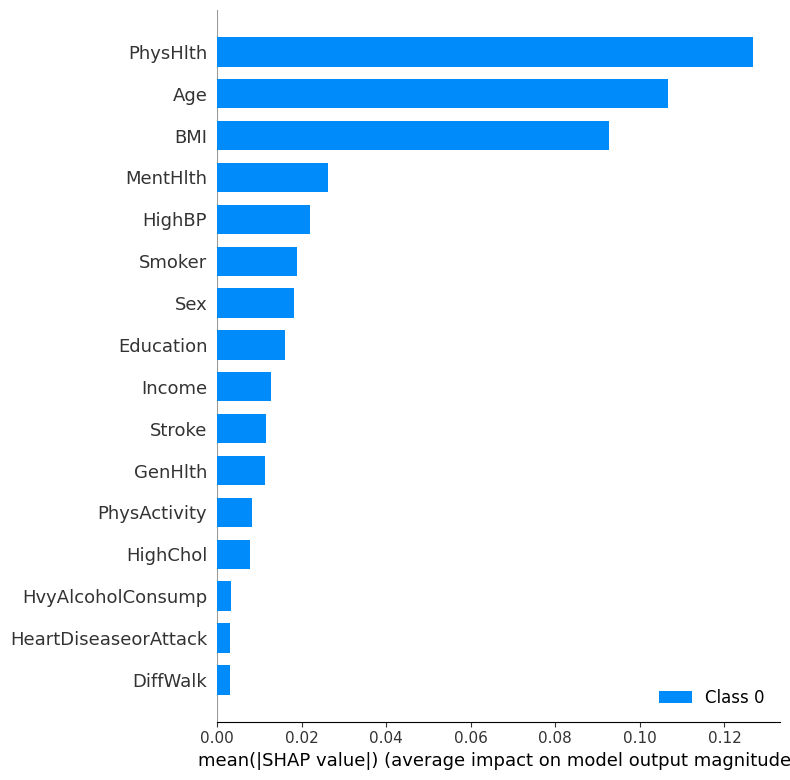

In [27]:
shap.summary_plot(shap_values,X_test)